# 워드 클라우드 - SOYNLP version

In [2]:
import re, joblib

In [3]:
with open('data/gift.txt', encoding='utf-8') as file:
    gift_text = file.read()

In [4]:
gift_text[:100]

'\n반지!목걸이!!!!!!!!\n커플 가디건이나 커플 모자는 어떠신지요 :-)\n몇개 추천제품들 투척하고 갑니다 ㅎㅎ\n더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건\nCOUPAN'

- 텍스트 전처리

In [6]:
new_gift_text = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', gift_text)
new_gift_text[:100]

' 반지 목걸이         커플 가디건이나 커플 모자는 어떠신지요     몇개 추천제품들 투척하고 갑니다 ㅎㅎ 더클래식 남녀 커플룩 오버핏 빅사이즈 하프 니트 가디건       '

- 명사 추출

In [18]:
# Konlpy 에서는 from konlpy.tag import Okt; okt = Okt(); okt.nouns(new_gift_text)

from soynlp.tokenizer import NounLMatchTokenizer

noun_scores = joblib.load('data/noun_scores.pkl')   # noun_scores 파일 다운로드
n_tokenizer = NounLMatchTokenizer(noun_scores)      # 명사 토큰화
gift_list = n_tokenizer.tokenize(new_gift_text)     #
len(gift_list)

16655

In [19]:
gift_list[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '어떠', '몇개', '추천제품들', '투척']

- 한글 폰트 사용

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

- 필요없는 단어 제거
    - 수동으로 반복처리

In [21]:
import nltk

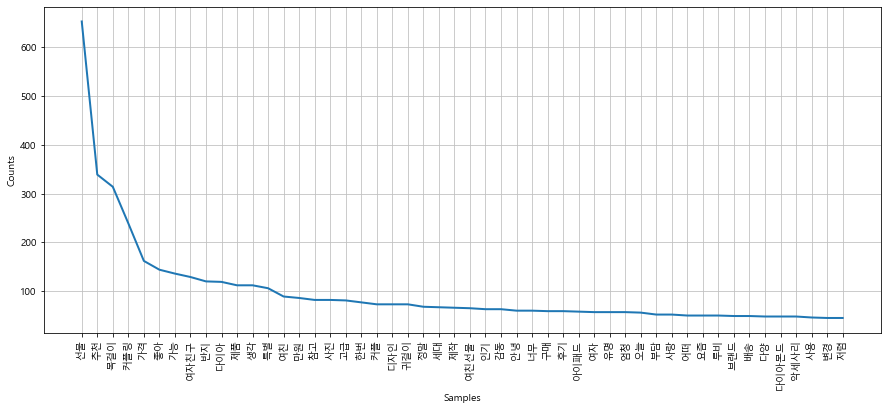

In [22]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

In [12]:
# stop_list = ['선물', '추천']
# gift_list = [gift for gift in gift_list if gift not in stop_list]

In [ ]:
# 위와 동일한 코드

# gl = []
# for gift in gift_list:
#     if gift not in stop_list:
#         gl.append(gift)
# gift_list = gl

In [50]:
stopwords = '안녕 너무 구매 후기 유명 여자 오늘 부담 엄청 어떠 브랜드 배송 다양 사용 변경 저렴 모양 선택 사람 조금 도움 의미 페이 사용가능 함께 아래 판매처 이런 상품 협찬 색상 가격 좋아 가능 여자친구 제품 생각 특별 여친 만원 참고 한번 고급 커플 선물 추천 정말 세대 제작 여친선물 인기 감동'
stop_list = stopwords.split()
gift_list = [gift for gift in gift_list if gift not in stop_list]

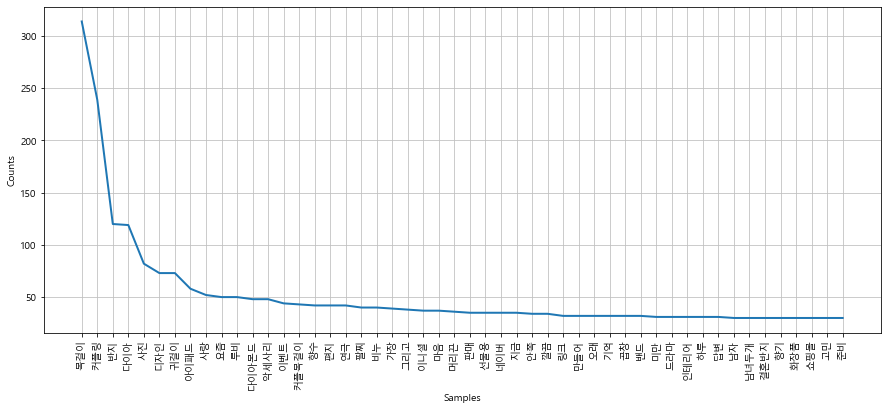

In [51]:
gf_gift = nltk.Text(gift_list, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)            # 많이 사용된 단어 50개 보여주기
plt.show()

- Wordcloud 그리기

In [42]:
import numpy as np
from PIL import Image  # heart 이미지에 여친 선물 목록 그리기 위해 임포트
from wordcloud import WordCloud 

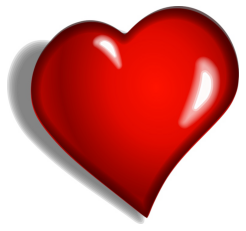

In [43]:
image = Image.open('data/heart.jpg')
plt.imshow(image)
plt.axis('off')     # 눈금 삭제
plt.show()

In [52]:
data = gf_gift.vocab().most_common(300)
data[:10]

[('목걸이', 314),
 ('커플링', 239),
 ('반지', 120),
 ('다이아', 119),
 ('사진', 82),
 ('디자인', 73),
 ('귀걸이', 73),
 ('아이패드', 58),
 ('사랑', 52),
 ('요즘', 50)]

In [45]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, background_color='white'
).generate_from_frequencies(dict(data))

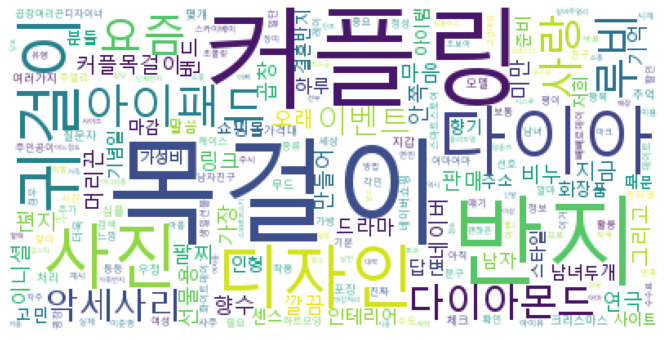

In [46]:
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

- 하트 그림에 표시하기

In [47]:
from wordcloud import ImageColorGenerator

mask = np.array(Image.open('data/heart.jpg'))          # 이미지 파일 불러오기
image_colors = ImageColorGenerator(mask) 

In [48]:
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2, background_color='white', mask=mask
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

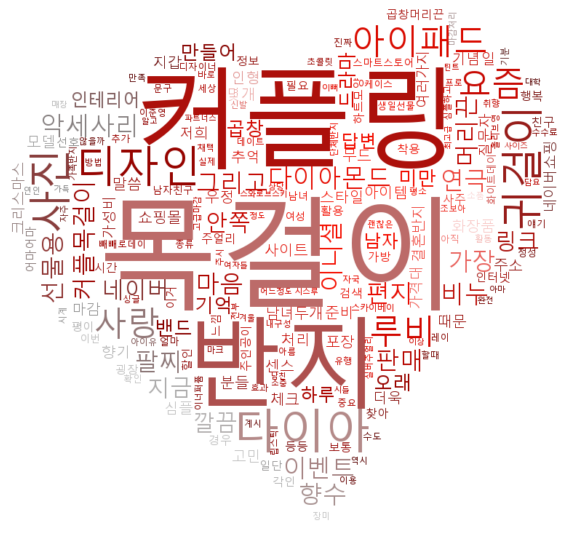

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()